# HOMEWORK 2 - TRANSFER FUNCTIONS AND SYSTEM IDENTIFICATION

This homework is about transfer functions and system identification.
There are two problems.

Make a copy of this notebook, and answer the questions.

# Preliminaries

In [1]:
import control
import numpy as np
import matplotlib.pyplot as plt
import sympy
import tellurium as te
import sympy

# Helpers

In [2]:
class PlotResult(object):

    def __init__(self, times=None, yt=None, ax=None):
        self.times = times
        self.yt = yt
        self.ax = ax
        
    def __repr__(self):
        return ""

In [3]:
def plotTF(tf, times=None, is_plot=True, figsize=(5,5)):
    if times is None:
        times = np.linspace(0, 10, 100)
    _, yt = control.forced_response(tf, T=times, U=1)
    if is_plot:
        _, ax = plt.subplots(1, figsize=figsize)
        ax.plot(times, yt)
        ax.set_xlabel("time")
    else:
        ax = None
    return PlotResult(times=times, yt=yt, ax=ax)

# Tests
tf = control.TransferFunction([1], [1, 0])
plot_result = plotTF(tf, is_plot=False)
assert(isinstance(plot_result, PlotResult))
print("OK!")

OK!


# Problem 1: Constructing Laplace Transforms for reaction networks

In this problem, you will construct a Laplace transform
for the same branching network we discussed in class, but with
a different input and output.
Below is the reaction network:

\begin{eqnarray}
s_1 & \xrightarrow{k_1 s_1} s_2 \\
s_2 & \xrightarrow{k_2 s_2} s_1 \\
s_1 & \xrightarrow{k_3 s_1} s_3 \\
u & \xrightarrow{k_1 u} s_2 \\
\end{eqnarray}

The input to the system is $u$; the output is $s_2$. (In class, the output
was $s_3$.)

## 1. (5 pts) System equations

Write the system equations for this reaction network.

**Answer**:

\begin{eqnarray}
\dot{s}_1 & = & k_2 s_2 - k_1 s_1 - k_3 s_1 \\
\dot{s}_2 & = & -k_2 s_2 + k_1 s_1 + k_1 u \\
\dot{s}_3 & = & k_3 s_1 \\
\end{eqnarray}

## 2. (5 pts) LT of system equations

Write the Laplace transforms of the system equations.

**Answer**:


\begin{eqnarray}
s S_1(s) & = & k_2 S_2(s) - k_1 S_1 (s) - k_3 S_1 (s) \\
s S_2 (s) & = & -k_2 S_2 (s) + k_1 S_1 (s) + k_1 U(s) \\
s S_3(s) & = & k_3 S_1 (s) \\
\end{eqnarray}

## 3. (25 pts) Calculate transfer function

Calculate the transfer function $G(s) = \frac{S_2 (s)}{U(s)}$

**Answer**

In [12]:
s, S_1, S_2, S_3, k_1, k_2, k_3, U = sympy.symbols("s, S_1, S_2, S_3, k_1, k_2, k_3, U")

In [15]:
expr1 = s*S_1 - k_2*S_2 + k_1*S_1 +k_3*S_1
expr2 = s*S_2 + k_2*S_2 - k_1*S_1 - k_1*U
expr3 = s*S_3 - k_3*S_1

In [21]:
sub_S_1 = sympy.solve(expr1, S_1)[0]
sub_S_1

S_2*k_2/(k_1 + k_3 + s)

In [19]:
sub_S_3 = sympy.solve(expr3, S_3)[0]
sub_S_3

S_1*k_3/s

In [22]:
new_expr2 = expr2.subs({S_1: sub_S_1, S_3: sub_S_3})
new_expr2

-S_2*k_1*k_2/(k_1 + k_3 + s) + S_2*k_2 + S_2*s - U*k_1

In [24]:
sympy.solve(new_expr2, S_2)[0]

U*k_1*(k_1 + k_3 + s)/(k_1*s + k_2*k_3 + k_2*s + k_3*s + s**2)

In [25]:
print(sympy.latex(sympy.solve(new_expr2, S_2)[0]))

\frac{U k_{1} \left(k_{1} + k_{3} + s\right)}{k_{1} s + k_{2} k_{3} + k_{2} s + k_{3} s + s^{2}}


$\frac{S_2(s)}{U(s)} = 
\frac{ k_{1} \left(k_{1} + k_{3} + s\right)}{k_{1} s + k_{2} k_{3} + k_{2} s + k_{3} s + s^{2}}$

## 4. (5 pts) Predict step response

Use the ``control`` package to construct the transfer function that you derived in Step 3, and simulate the transfer function. Plot the result.

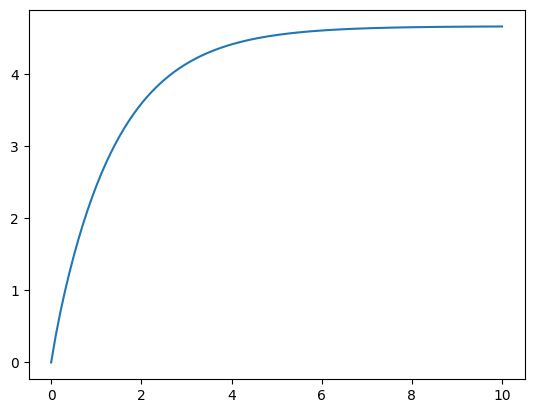

In [28]:
# Initialize constants
k1, k2, k3 = (4, 2, 3)
times = np.linspace(0, 10, 100)
# Response to input
tf = control.TransferFunction([k1, k1*(k1 + k3)],
                              [1, k1 + k2 + k3, k2*k3])
_, yt = control.forced_response(tf, T=times, U=1)
# Plot the results
plt.plot(times, yt)

## 5. (5 pts) Simulate in Antimony

Write an Antimony model for the original system and simulate it for a step respoinse.

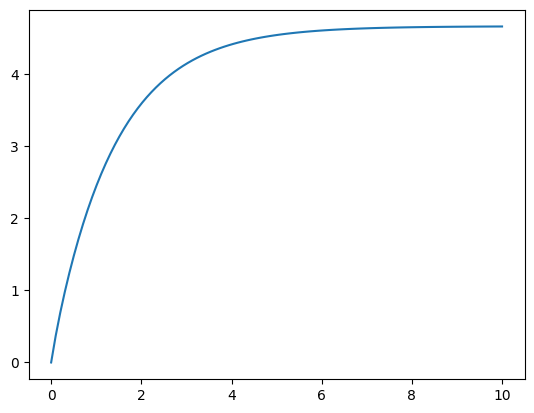

In [27]:
model = """
s1 -> s2; k1*s1
s2 -> s1; k2*s2
s1 -> s3; k3*s1
$u -> s2; k1*u

k1 = 4
k2 = 1
k3 = 1
s1 = 0
s2 = 0
s3 = 0
k2 = 2
k3 = 3
$u = 1
"""
rr = te.loada(model)
data = rr.simulate(0, 10, 100)
plt.plot(data["time"], data["[s2]"])

## 6. (5 pts) Analysis

1. How does the transfer function you derived and simulated in step 3 compare with the simulation results for the Antimony model in step 4?
1. How does DC gain change as $k_1$ increases?
1. Explain why the DC gain of this system is finite whereas the DC gain of the system with $s_3$ as output does not have finite DC gain.


**Answer**:



1. Same curve.
1. DC gain increases.
1. $s_2$ has a reversible reaction with $s_1$ whereas $s_3$ does not.

# Problem 2: System Identification

You will do system identification for the system you chose in the first homework.

## 1. (20 pts) Determine the operating region for you system.

Use ``SISOTransferFunctionBuilder`` to plot a staircase of the control input to your system and the measured output.
Explain why you chose the operating region you did (i.e., the value ranges of
the control input).

## 2. (20 pts) Find a tranfser function for your system for the operating region.

Use ``SISOTransferFunctionBuilder`` to fit a transfer function for your system.
Justify that the transfer function fits sufficiently well and does not overfit.

## 3. (10 pts)  Analyze the transfer function.

What is the DC gain? What are the poles? What are the implications for control?